# Proyecto final Mod. 1 ITLA 
==============

# Diplomado Ciencia de Datos


### Grupo 1

###  Miembros: 
* Rudy Inoa
* Angel Ventura
* Victor A. Sosa
* Manuel Jose
* Yaneris Betances(Lider)


### (10 puntos) Inicio de la presentación de resultado

 Asumiendo que la base de datos están disponibles en un sistema de gestión de bases de datos.
 
 Hacer una conexión desde R a sus sistemas de base de datos para extraer los años  asignados a su grupo.

In [2]:
#Script: PrepareData.r
#Autor: Manuel Jose
#Fecha: 12-02-2018
#Objetivo: Intrucciones preparativas de carga de datos del proyecto.
#Objetivos Especificos:
#   -Desde R, descargar y descomprimir los ficheros correspondientes a los años dados.
#   -Cargar en base de datos los ficheros
#   -Retornor un dataframe con los datos cargados, años y cantidad de lineas cargadas


#Paquetes librerias necesarias
#install.packages("RMySQL",dependencies = T)

#Cargar libreria RMySQL
#install.packages(DBI)
require(DBI)
library(RMySQL)

#Constantes de conecion a base de datos, cambiar a discreción
prop.dbname <- 'proymod1'
prop.host <-  '127.0.0.1'
prop.port <-  3306
prop.user = 'itladsgpo@localhost'
prop.password <-  '123456'

#Funcion que retornora la variable de conecion de conecion a la base de datos
openConnectionDB <- function() {
        conn <- dbConnect(MySQL(),
                         dbname = prop.dbname,
                         host = prop.host,
                         port = prop.port ,
                         user = prop.user,
                         password = prop.password)
        conn
}

closeConnectionDB <- function(conn){
        dbDisconnect(conn)
}

#dropTables esta funcion conecta con la con la base e datos y borrar las tablas indicadas en un vector.
dropTables <-function(){
  # Conectar con una instancia de postgreSQL
  conn <- openConnectionDB()

  #Recorrer el vector de nombre de tablas
  for (t in c('airports','carrier','rita'))
    dbRemoveTable(conn,t) #Borrar las tablas con nombre t

  # Desconectar de la instancia
  closeConnectionDB(conn)
}

#savedftodb, funcion que se conecta a la base de datos, y guarda los datos al df
savedftodb <- function(nameTable,df){

  # Conectar con la instancia de base de datos
  conn <- openConnectionDB()

  #Escribe la tabla, y agrega los registros, append si exite la base de datos agregar los datos
  dbWriteTable(conn, nameTable, append=TRUE , df)

  # Desconectar de la instancia
  closeConnectionDB(conn)
}

#savedftodb: Baja los datos desde la pagina: http://stat-computing.org/dataexpo/2009/; Lee y descomprime con la funcion bzfile combinada con read_csv, posterior guarda los
#datos en la tabla que se ha indicado en el primer parametro, por defecto se indica no descargar los archivos.
loadFile <- function(year,downloadFile=F){
  kURLPATH <- 'http://stat-computing.org/dataexpo/2009/'  #constante donde esta el repositorio de archivos
  ext <- '.csv.bz2'; #extension de los ficheros de anos
  file <- paste(year,ext,sep='') # pegar año, extension, separacion sin espacio y asignar a la variable file, este archivo sera el destino

  url = paste(kURLPATH,file,sep='')  # pegar constante kURLPATH, fichero o año,  sin espacio y asignar a la variable url
  if (downloadFile == T){
    print(paste(c("Descargar archivo:",file),sep=" "))
    download.file(url,file) #decarga el fichero en la url, y es destinado a file
  }

  df <- read.csv(bzfile(file),header = T, sep = ',') #lee el fichero descargado descomprime el archivo en memoria, contiene cabecera, y es separado por coma, este devolvera un dataframe
  print(paste(c("Guardar en tabla rita:",file),sep=" "))
  savedftodb('rita', df) #invoca la funcion savedftodb, y guarda en la tabla rita
}

loadFileAux <- function(aux){
  kURLPATH <- 'http://stat-computing.org/dataexpo/2009/' #constante donde esta el repositorio de archivos
  ext <- '.csv'; #extension de los archivos auxiliares.
  url <- paste(kURLPATH,aux,ext,sep='') #pegar ruta de la url, con nombre del fichero y su extension, sin separaciones, y destinar a url
  df <-  read.csv(url, sep = ",", header = TRUE  ) # leer el fichero csv directamente desde le servidor, indicar que no tiene separadores, y que poseee encabezado
  savedftodb(aux, df) #invoca la funcion savedftodb, y guarda en la tabla aux segun corresponda
}

#invoca a la funcion borrartablas si las mismas existen.
#dropTables()

#recorrer los años desde el 1987 hasta 1991, en este caso no descargar archivo porque se ha realizado previamentes, 1 recorre por fila la matriz creada, y se ejecutara en paralelo por año.
#apply(matrix(c(1987:2008)), downloadFile=F, 1, loadFile) 

#recorrer el vector creado airpors y carriers, ejecutar loadFileAux donde lee el csv en el servidor y guardara en nuestra bbdd.
#apply(matrix(c('airports','carriers')),1,loadFileAux)


## Usando codificación en R para analizar los datos

### (25 puntos) Hacer un análisis descriptivo de cada año.
 Usando frecuencias relativas y absolutas analizar al menos (4 variables diferentes) y (graficar).
 Usando cruce de variables analizar (al menos 4 variables) que explique el comportamiento con relación a la cantidad de vuelos.
 Realizar un análisis de serie de tiempo, explique el comportamiento de la cantidad de vuelos con relación a 3 diferentes variables (graficar).

[1] TRUE

[1] "row_names"         "Year"              "Month"            
 [4] "DayofMonth"        "DayOfWeek"         "DepTime"          
 [7] "CRSDepTime"        "ArrTime"           "CRSArrTime"       
[10] "UniqueCarrier"     "FlightNum"         "TailNum"          
[13] "ActualElapsedTime" "CRSElapsedTime"    "AirTime"          
[16] "ArrDelay"          "DepDelay"          "Origin"           
[19] "Dest"              "Distance"          "TaxiIn"           
[22] "TaxiOut"           "Cancelled"         "CancellationCode" 
[25] "Diverted"          "CarrierDelay"      "WeatherDelay"     
[28] "NASDelay"          "SecurityDelay"     "LateAircraftDelay"

Dest
BUR LAS LAX OAK PDX RNO SAN SFO SJC SNA 
 56  88  77 296  23  29 188 122  13 108 

Dest
  BUR   LAS   LAX   OAK   PDX   RNO   SAN   SFO   SJC   SNA 
0.056 0.088 0.077 0.296 0.023 0.029 0.188 0.122 0.013 0.108 

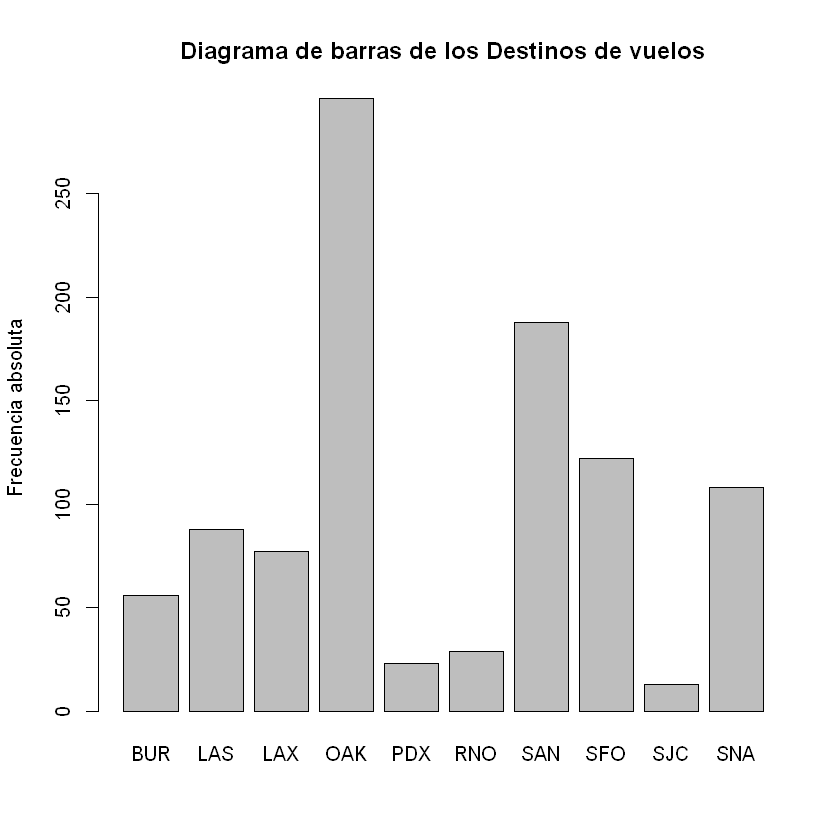

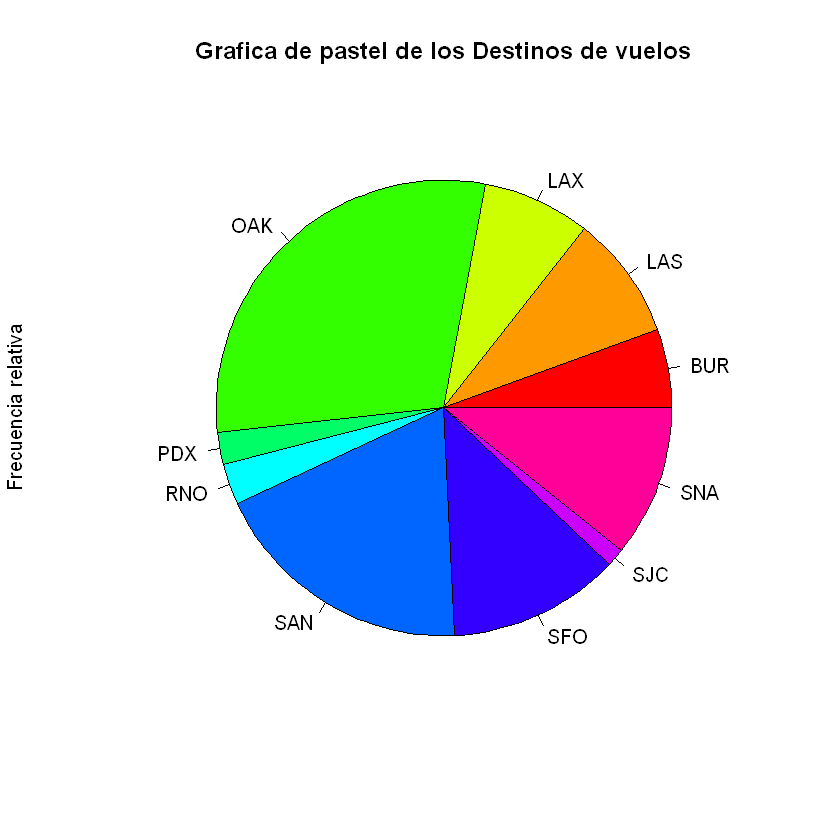

In [6]:
#Script: PrepareData.r
#Autor: Yaneris Betances

#cargar objectos R: funciones y variables contenidas en este ficheros de db 
#source("PrepareData_MySQL.r")
#library(dplyr)
#Punto 1-Usando frecuencias relativas y absolutas analizar al menos (4 variables diferentes) y (graficar).

conn <- openConnectionDB()
 
df <- dbGetQuery(conn, "select * from rita where year=1987 limit 1000;")

closeConnectionDB(conn)

names(df)
dim.datos <- dim(df)

n.ind = dim.datos[1]
n.var = dim.datos[2]
attach(df)
#1
fabsDest<-table(Dest)
fabsDest
frelDest<-fabsDest/n.ind
frelDest
barplot(fabsDest,ylab = "Frecuencia absoluta", main="Diagrama de barras de los Destinos de vuelos")
pie(frelDest, col=rainbow(10), ylab = "Frecuencia relativa", main=c("Grafica de pastel de los Destinos de vuelos"))



Origin
BUR LAS LAX OAK PHX SAN SFO SJC SMF SNA 
 81   8 100 297  26 127 117   3  51 190 

Origin
  BUR   LAS   LAX   OAK   PHX   SAN   SFO   SJC   SMF   SNA 
0.081 0.008 0.100 0.297 0.026 0.127 0.117 0.003 0.051 0.190 

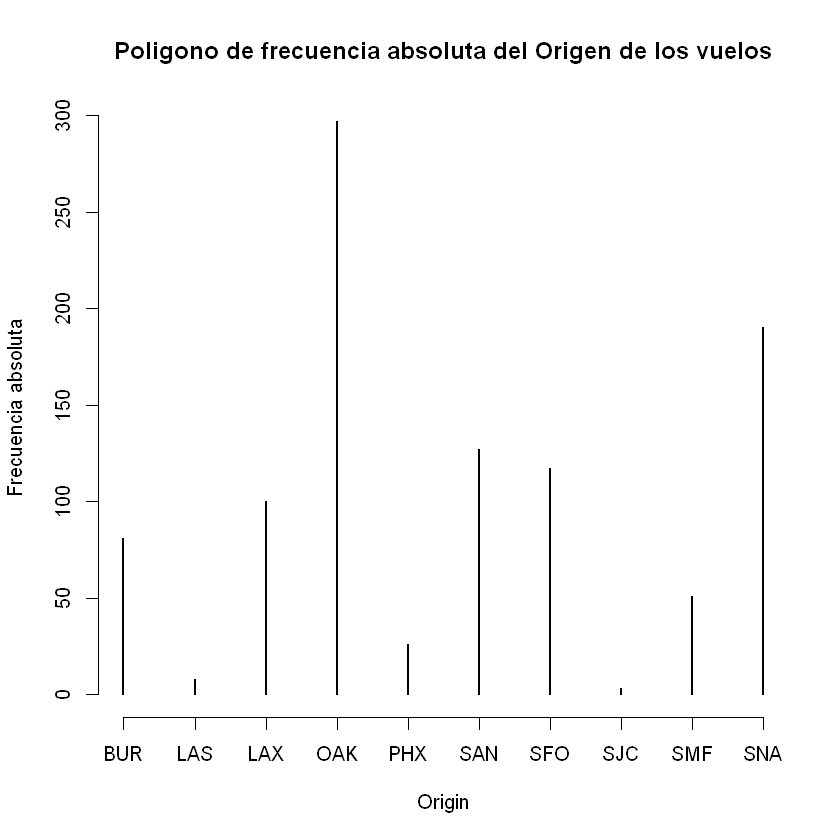

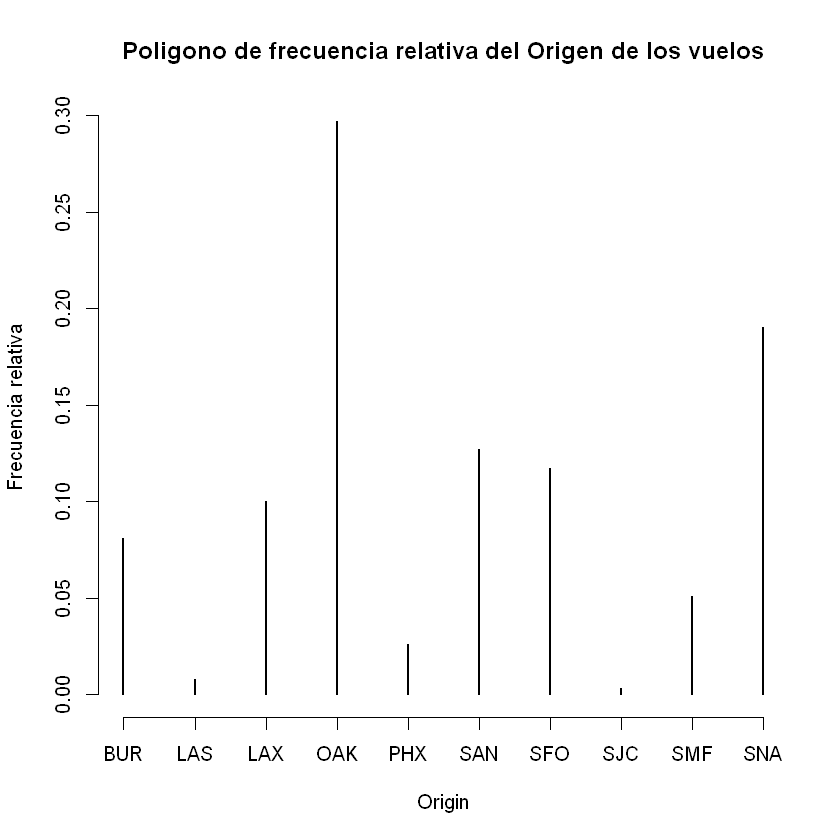

In [7]:

#2
fabsOrigin<-table(Origin)
fabsOrigin
frelOrigin<-fabsOrigin/n.ind
frelOrigin
plot(fabsOrigin,main=c("Poligono de frecuencia absoluta del Origen de los vuelos"), ylab = "Frecuencia absoluta")
plot(frelOrigin,main=c("Poligono de frecuencia relativa del Origen de los vuelos"), ylab = "Frecuencia relativa")


FlightNum
1451 1453 1454 1455 1457 1459 1460 1463 1464 1465 1468 1470 1471 1472 1473 1474 
  43   25   26    1   42   49   27   30    3   25   18    1   20   24   22    5 
1475 1476 1477 1478 1479 1480 1481 1482 1483 1484 1485 1486 1489 1490 1491 1492 
  34   23   21   34   24   25   28    9    9   22   26   25   30   60   28   49 
1494 1496 1497 1500 1502 1503 
  29   50   47   29   24   13 

FlightNum
 1451  1453  1454  1455  1457  1459  1460  1463  1464  1465  1468  1470  1471 
0.043 0.025 0.026 0.001 0.042 0.049 0.027 0.030 0.003 0.025 0.018 0.001 0.020 
 1472  1473  1474  1475  1476  1477  1478  1479  1480  1481  1482  1483  1484 
0.024 0.022 0.005 0.034 0.023 0.021 0.034 0.024 0.025 0.028 0.009 0.009 0.022 
 1485  1486  1489  1490  1491  1492  1494  1496  1497  1500  1502  1503 
0.026 0.025 0.030 0.060 0.028 0.049 0.029 0.050 0.047 0.029 0.024 0.013 

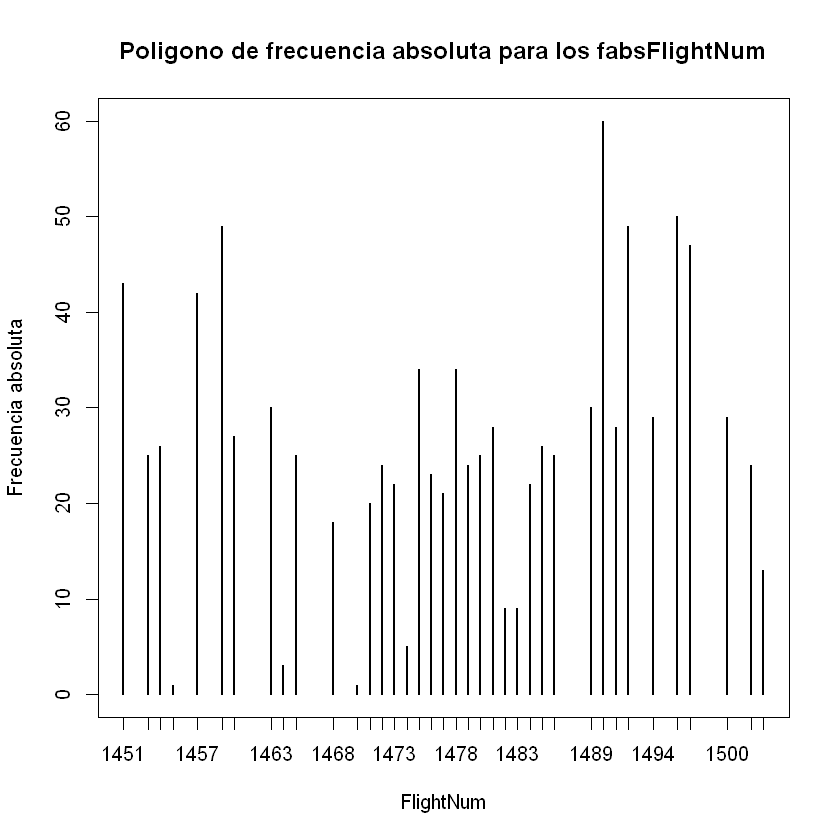

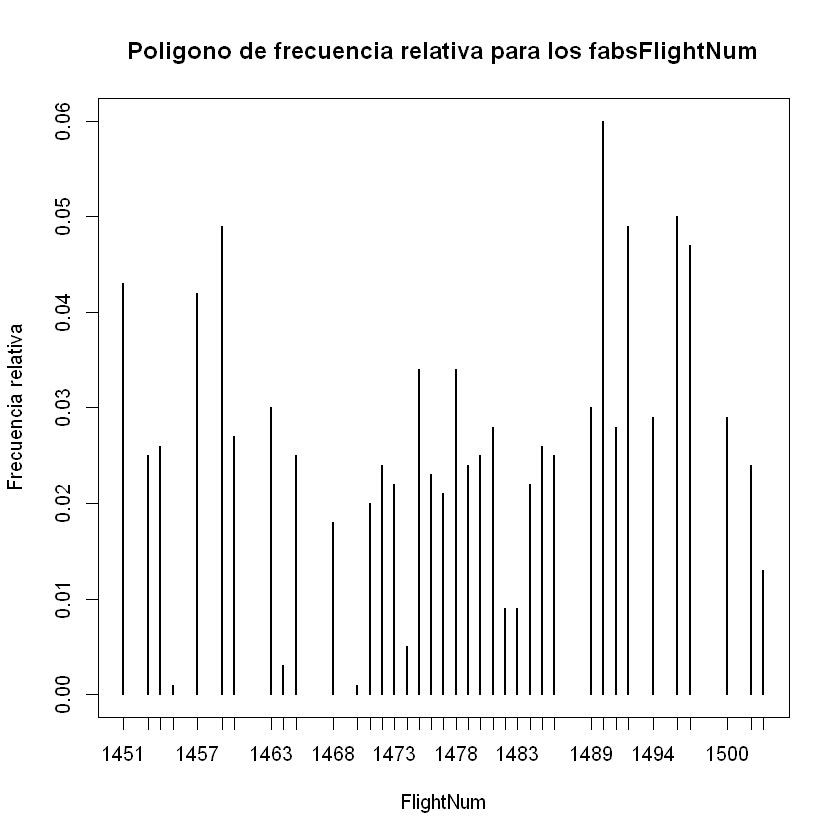

In [8]:

#3
fabsFlightNum<-table(FlightNum)
fabsFlightNum
frelFlightNum<-fabsFlightNum/n.ind
frelFlightNum
plot(fabsFlightNum,main=c("Poligono de frecuencia absoluta para los fabsFlightNum"), ylab = "Frecuencia absoluta")
plot(frelFlightNum,main=c("Poligono de frecuencia relativa para los fabsFlightNum"), ylab = "Frecuencia relativa")


DayOfWeek
  1   2   3   4   5   6   7 
141 147 135 177 180  97 123 

DayOfWeek
    1     2     3     4     5     6     7 
0.141 0.147 0.135 0.177 0.180 0.097 0.123 

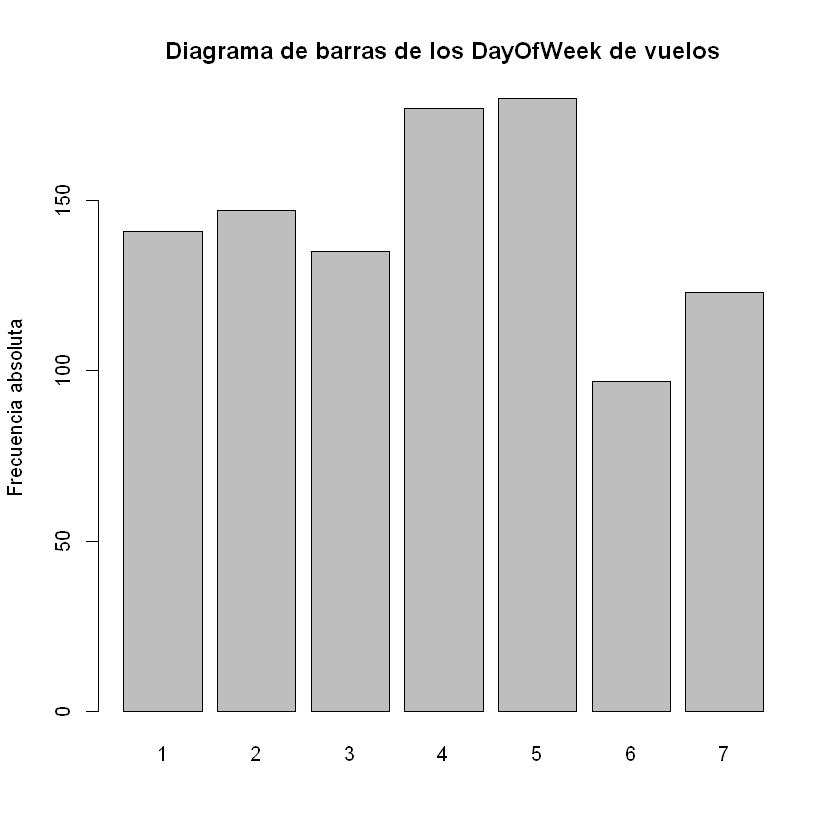

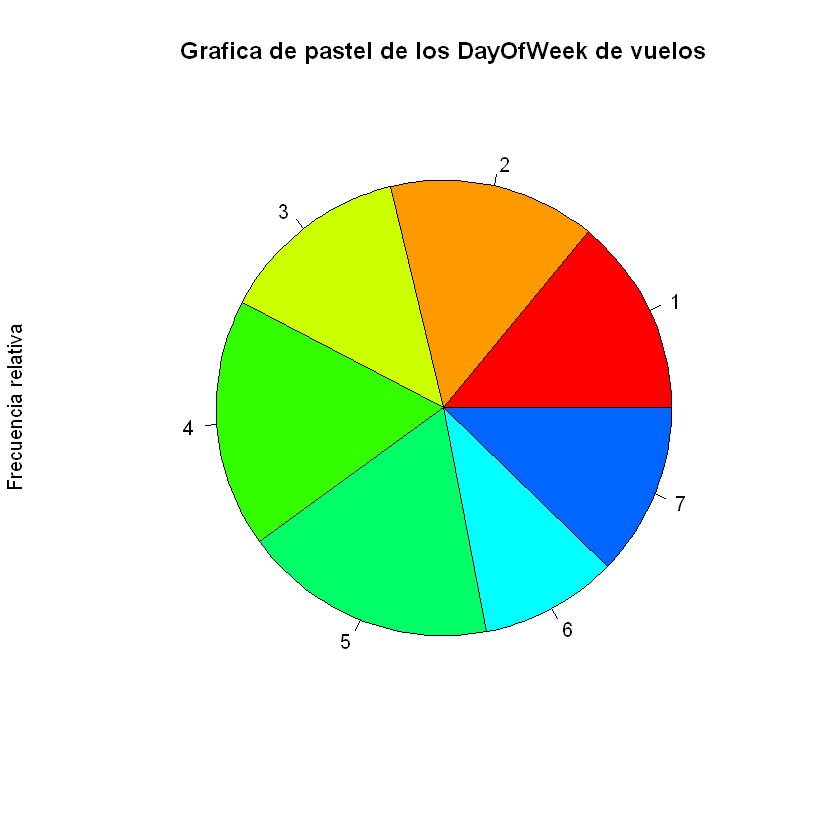

In [9]:

#4
fabsDayOfWeek<-table(DayOfWeek)
fabsDayOfWeek
frelDayOfWeek<-fabsDayOfWeek/n.ind
frelDayOfWeek
barplot(fabsDayOfWeek,ylab = "Frecuencia absoluta", main="Diagrama de barras de los DayOfWeek de vuelos")
pie(frelDayOfWeek, col=rainbow(10), ylab = "Frecuencia relativa", main=c("Grafica de pastel de los DayOfWeek de vuelos"))




### (20) Correlación
 Usando la base de datos completa por año: encontrar las variables que tienen mayor correlación (explicar por qué).

In [10]:
#Autor: Manuel Jose
#Fecha: 13-02-2018
#Objetivo: Usando la base de datos completa por año: encontrar las variables 
#          que tienen mayor correlación (explicar por qué).

#cargar objectos R: funciones y variables contenidas en este ficheros de db 
#source("PrepareData_MySQL.r")
#library(dplyr)

#Extraer los datos de la tabla rita por años, de cada año solo seleccionara el limite en espeficico
#Devolvera un dataframe con los datos indicado, si se epeficica limit menor que 1 extrae todo los valores
extractDataRitaByYear <-function (year , limit=100, onlyMax=T){
        extractdfbritabyyear <- function(year, limit){
                #Crear limite y consulta a ser expuesta en la base de datos
                limitString <- if (limit <= 0) {""} else {paste(c("LIMIT", limit ), collapse = " ")}
                selectSQL <- paste(c("SELECT ActualElapsedTime, CRSElapsedTime, ArrDelay, DepDelay, Distance FROM rita where year= ",year, limitString),  collapse = " ")
                # ActualElapsedTime, CRSElapsedTime, ArrDelay, DepDelay, Distance, TaxiIn 
                conn <- openConnectionDB()
                dfyear <- dbGetQuery(conn, selectSQL)

                #Cerrar conecion a la base de datos
                closeConnectionDB(conn)
                
                #Filtrar y reutilizar dataframe de los datos de year
                dfyear <- Filter( is.numeric, dfyear)
                
                #Retornar dataframe con los datos filtrados
                dfyear
        }
        
        #asigar año y con limite o cantidad de datos especificos en el dataframe df, utilizadon la funcion extractdfbritabyyear
        df <- extractdfbritabyyear(year, limit)
        
        #La funcion cor devolvera una matrix con las correlaciones de las variables,
        #"pairwise.complete.obs" nos indica que hara las observaciones valor por valor evitando NA y valores incompletos, 
        mcor <- cor(df,use = "pairwise.complete.obs", method="pearson")
        
        #Borrar de memoria el datafram de todo los datos.
        rm(df)
        
        #Crear un dataframe vacio, con la estructura de año, fila, columna y el valor de la correlacion.
        dfmax <- data.frame(year=integer(),
                            row=character(),
                            col=character(), 
                            value=double(), 
                            stringsAsFactors=FALSE) 
        
        #Almacenar nombres de las columnas y de las filas de la matriz de correlaciones
        nc <- colnames(mcor)
        nr <- rownames(mcor)
        
        #for anidaddo de para recorre filas y columnas,  donde llenamos el dataframe dfmax con cada valor
        for(r in 1:nrow(mcor)){
                for(c in 1:ncol(mcor)){
                        #no agregar columnas y filas iguales, dado que es el missmo valor, , dado que la correlacion de x vs x, es igual a 1.
                        if (r != c){
                           #Crear la lista, y asignar al dataframe en la siguiente fila
                           dfmax[nrow(dfmax) + 1,] = list(year, nr[r], nc[c], mcor[r, c])
                         }
                }      
        }
        
        # si el paramentro de onlyMax es verdadero se retornoara solo el par de valores mayores.
        if (onlyMax==T){
                #Determinar la posicion del mayor valor, del dataframe de a columna value, esto se asignara maxval
                maxval <- which(dfmax$value == max(dfmax$value), arr.ind = TRUE)
                
                #Retornar la mayor correlacion
                return (dfmax[maxval,] )
        }
        
        #Retornar todo el dataframe por defecto
        dfmax
}

sapply(1987:1991, extractDataRitaByYear, simplify = F, limit=100, onlyMax= F)
##[[1]]
##   year            row            col     value
##8  1987 CRSElapsedTime       Distance 0.9417885
##18 1987       Distance CRSElapsedTime 0.9417885
##
##[[2]]
##   year      row      col     value
##11 1988 ArrDelay DepDelay 0.9165414
##15 1988 DepDelay ArrDelay 0.9165414
##
##[[3]]
##   year            row            col     value
##8  1989 CRSElapsedTime       Distance 0.9957562
##18 1989       Distance CRSElapsedTime 0.9957562
##
##[[4]]
##   year            row            col     value
##8  1990 CRSElapsedTime       Distance 0.9998595
##18 1990       Distance CRSElapsedTime 0.9998595
##
##[[5]]
##   year            row            col     value
##8  1991 CRSElapsedTime       Distance 0.9972362
##18 1991       Distance CRSElapsedTime 0.9972362
##

##Interpretacion con excepcion del 1988, nos indica que existe una realacion directa entre 
##tiempo de vuel y distancia lo cual es natural. 

[[1]]
   year               row               col       value
1  1987 ActualElapsedTime    CRSElapsedTime  0.77160486
2  1987 ActualElapsedTime          ArrDelay -0.07459372
3  1987 ActualElapsedTime          DepDelay -0.24379979
4  1987 ActualElapsedTime          Distance  0.71870465
5  1987    CRSElapsedTime ActualElapsedTime  0.77160486
6  1987    CRSElapsedTime          ArrDelay -0.29091741
7  1987    CRSElapsedTime          DepDelay -0.16157149
8  1987    CRSElapsedTime          Distance  0.94178851
9  1987          ArrDelay ActualElapsedTime -0.07459372
10 1987          ArrDelay    CRSElapsedTime -0.29091741
11 1987          ArrDelay          DepDelay  0.90134378
12 1987          ArrDelay          Distance -0.31058640
13 1987          DepDelay ActualElapsedTime -0.24379979
14 1987          DepDelay    CRSElapsedTime -0.16157149
15 1987          DepDelay          ArrDelay  0.90134378
16 1987          DepDelay          Distance -0.18413371
17 1987          Distance ActualElapsedTime  0.71870465
18 1987          Distance    CRSElapsedTime  0.94178851
19 1987          Distance          ArrDelay -0.31058640
20 1987          Distance          DepDelay -0.18413371

[[2]]
   year               row               col       value
1  1988 ActualElapsedTime    CRSElapsedTime  0.76718006
2  1988 ActualElapsedTime          ArrDelay  0.38010984
3  1988 ActualElapsedTime          DepDelay  0.17799277
4  1988 ActualElapsedTime          Distance  0.78145417
5  1988    CRSElapsedTime ActualElapsedTime  0.76718006
6  1988    CRSElapsedTime          ArrDelay -0.01315622
7  1988    CRSElapsedTime          DepDelay -0.07740372
8  1988    CRSElapsedTime          Distance  0.90602790
9  1988          ArrDelay ActualElapsedTime  0.38010984
10 1988          ArrDelay    CRSElapsedTime -0.01315622
11 1988          ArrDelay          DepDelay  0.91654137
12 1988          ArrDelay          Distance  0.03503592
13 1988          DepDelay ActualElapsedTime  0.17799277
14 1988          DepDelay    CRSElapsedTime -0.07740372
15 1988          DepDelay          ArrDelay  0.91654137
16 1988          DepDelay          Distance -0.07165699
17 1988          Distance ActualElapsedTime  0.78145417
18 1988          Distance    CRSElapsedTime  0.90602790
19 1988          Distance          ArrDelay  0.03503592
20 1988          Distance          DepDelay -0.07165699

[[3]]
   year               row               col     value
1  1989 ActualElapsedTime    CRSElapsedTime 0.9908035
2  1989 ActualElapsedTime          ArrDelay 0.2788666
3  1989 ActualElapsedTime          DepDelay 0.2406481
4  1989 ActualElapsedTime          Distance 0.9912938
5  1989    CRSElapsedTime ActualElapsedTime 0.9908035
6  1989    CRSElapsedTime          ArrDelay 0.2343735
7  1989    CRSElapsedTime          DepDelay 0.2413900
8  1989    CRSElapsedTime          Distance 0.9957562
9  1989          ArrDelay ActualElapsedTime 0.2788666
10 1989          ArrDelay    CRSElapsedTime 0.2343735
11 1989          ArrDelay          DepDelay 0.9423679
12 1989          ArrDelay          Distance 0.2194257
13 1989          DepDelay ActualElapsedTime 0.2406481
14 1989          DepDelay    CRSElapsedTime 0.2413900
15 1989          DepDelay          ArrDelay 0.9423679
16 1989          DepDelay          Distance 0.2130779
17 1989          Distance ActualElapsedTime 0.9912938
18 1989          Distance    CRSElapsedTime 0.9957562
19 1989          Distance          ArrDelay 0.2194257
20 1989          Distance          DepDelay 0.2130779

[[4]]
   year               row               col       value
1  1990 ActualElapsedTime    CRSElapsedTime 0.995376433
2  1990 ActualElapsedTime          ArrDelay 0.031070075
3  1990 ActualElapsedTime          DepDelay 0.102782186
4  1990 ActualElapsedTime          Distance 0.995340680
5  1990    CRSElapsedTime ActualElapsedTime 0.995376433
6  1990    CRSElapsedTime          ArrDelay 0.002191246
7  1990    CRSElapsedTime          DepDelay 0.101137398
8  1990    CRSElapsedTime          Dist

### (25) Muestreo
Determinar el tamaño de muestras representativas por año y aerolínea.

Luego que se tenga la cantidad por año y aerolínea hacer una selección sistemática de los registros de las bases de datos que pertenecerán a la muestra.

In [ ]:
#Grupo 1
#Script: muestreo_Victor.R
#Autor: Victor Sosa

#cargar objetos R: librerías, funciones y variables contenidas en este ficheros de db 
#source("PrepareData_MySQL.r")
#install.packages("dplyr")
library(dplyr)
library(SamplingUtil)


# Cargar rita solo año 1987
conn <- openConnectionDB()

df87 <- dbGetQuery(conn, "select * from rita where year=1987 LIMIT 10000;")

closeConnectionDB(conn)

# Función que calcula el tamaño de la muestra representativa
samp.size = function(z.val, margin, c.interval, population) {
        ss = (z.val^2 * margin * (1 - margin))/(c.interval^2)
        return(ss/(1 + ((ss - 1)/population)))
}


#Agrupar por UniqueCarrier (UniqueCarrier, Cantidad de vuelos)
df87G <- tbl_df(count(df87, UniqueCarrier))

#Agregar columna tamañoMuestra para cada Carrier, utilizando samp.size()
#Nivel de confianza = 95% -> Z = 1.96
#Varianza de la proporción = 0.5 -> margin = 0.5
#Error = 3% -> interval = 0.03
#Población es la cantidad de registros que hay de ese año y linea aerea (columna n)
df87G <- cbind(df87G, tamañoMuestra = samp.size(1.96, 0.5, 0.03, df87G$n))

# Recorrer el dataframe que contiene la agrupación de los vuelos por línea aerea, y la cantidad de muestra representativa para cada agrupación
for(r in 1:nrow(df87G)){
        #Almacena la línea aerea
        carrier <- df87G[r, c('UniqueCarrier')]
        #Almacena el tamaño de la muestra
        tamañoMuestraCarrier <- df87G[r, c('tamañoMuestra')]
        #Almacena la cantidad de vuelos de línea aerea
        cantidadRegCarrier <- df87G[r, c('n')]
        
        #Guardar en el vector "muestras" los índices de los registros que forman la muestra de la población
        # Utilizando la función paste() "se genera" la instrucción para esto
        # Ej: muestras <- sys.sample(df87G[1, c('n')], df87G[1, c('tamañoMuestra')])
        assign(paste('muestras', gsub('[^A-Za-z]', '', carrier), sep=''), sys.sample(cantidadRegCarrier, tamañoMuestraCarrier))
        
        #Crear dataframe con solo registros de la aerolínea 
        # Utilizando la función paste() "se genera" la instrucción para esto
        # Ej: df87AA <- df87[df87$UniqueCarrier == 'AA',]
        assign(paste('df87', gsub('[^A-Za-z]', '', carrier), sep=''), df87[df87$UniqueCarrier == carrier,]) 
        
        #Seleccionar desde el dataframe creado con solo los registros de la aerolinea, los registros indicados por el muestreo (utilizando los índices almacenados anteriormentes en el vector)
        # Utilizando la función paste() "se genera" la instrucción para esto
        # Ej: muestra87AA <- df87AA[c(muestras),]
        assign(paste('muestra87', gsub('[^A-Za-z]', '', carrier), sep=''), eval(parse(text=paste('df87', gsub('[^A-Za-z]', '', carrier), '[c(muestras', gsub('[^A-Za-z]', '', carrier), '),]', sep=''))))
    
        #Retorna el dataframe  con la muestra representativa
        print(eval(parse(text=paste('muestra87', gsub('[^A-Za-z]', '', carrier), sep=''))))
}

### (20) Regresión
Usando la base de datos completa por año: hacer regresión lineal simple con las variables que tienen mayor correlación y hacer estimaciones con las mismas.


Warning message:
"Closing open result sets"Warning message:
"Closing open result sets"Warning message:
"Closing open result sets"

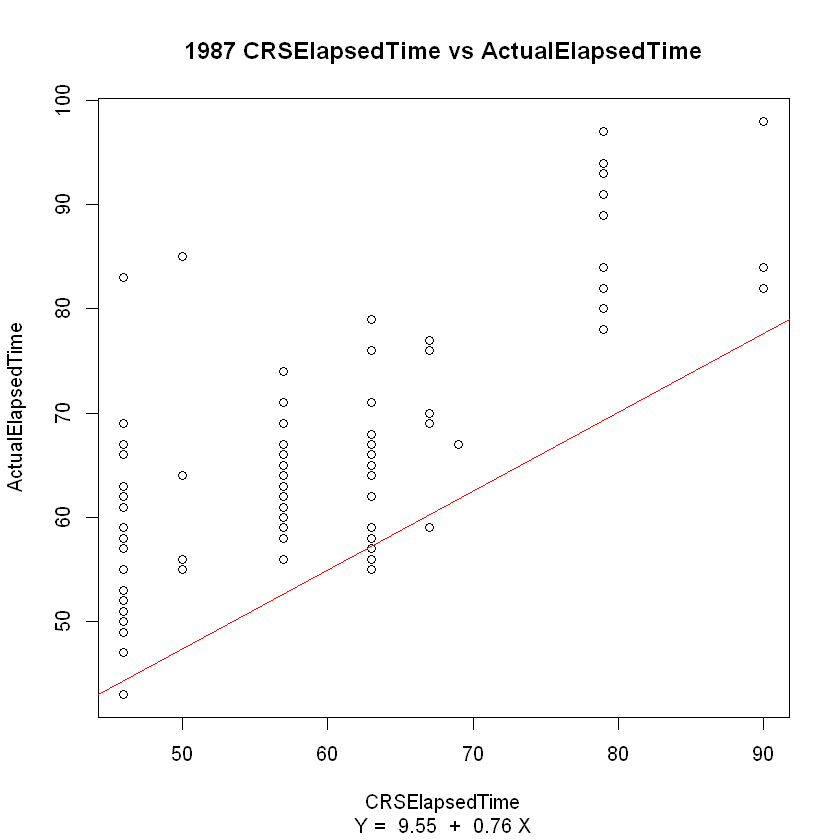

Warning message:
"Closing open result sets"

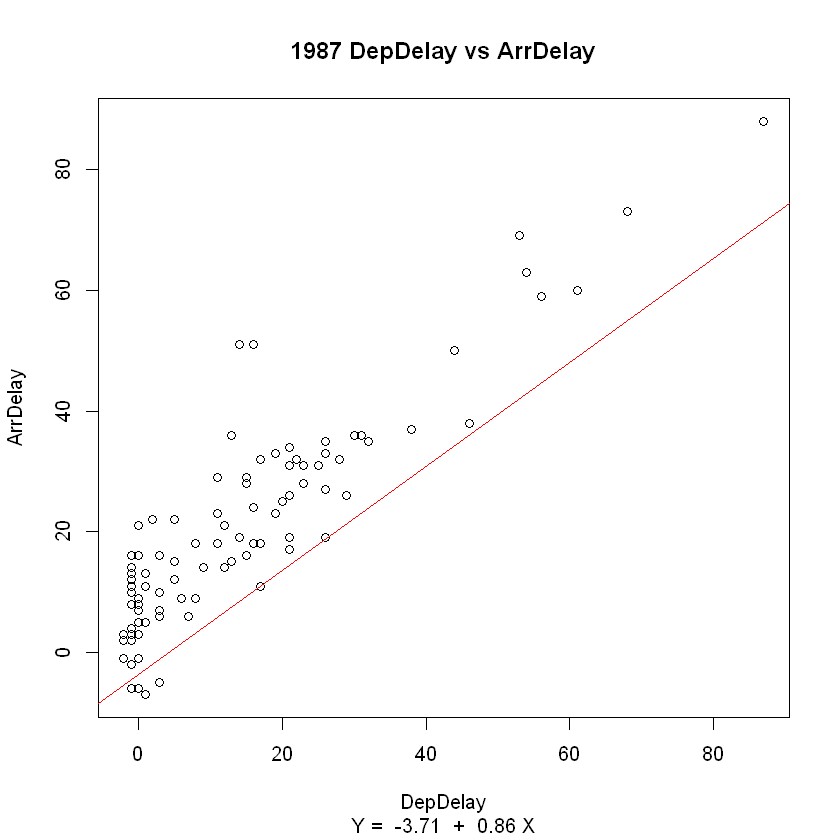

Warning message:
"Closing open result sets"

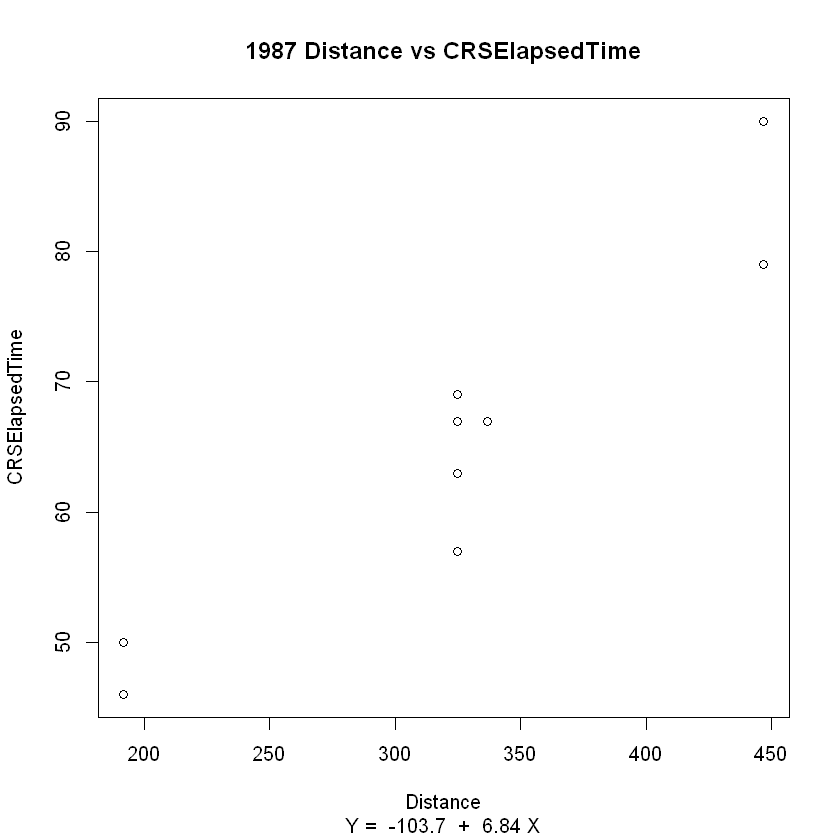

Warning message:
"Closing open result sets"

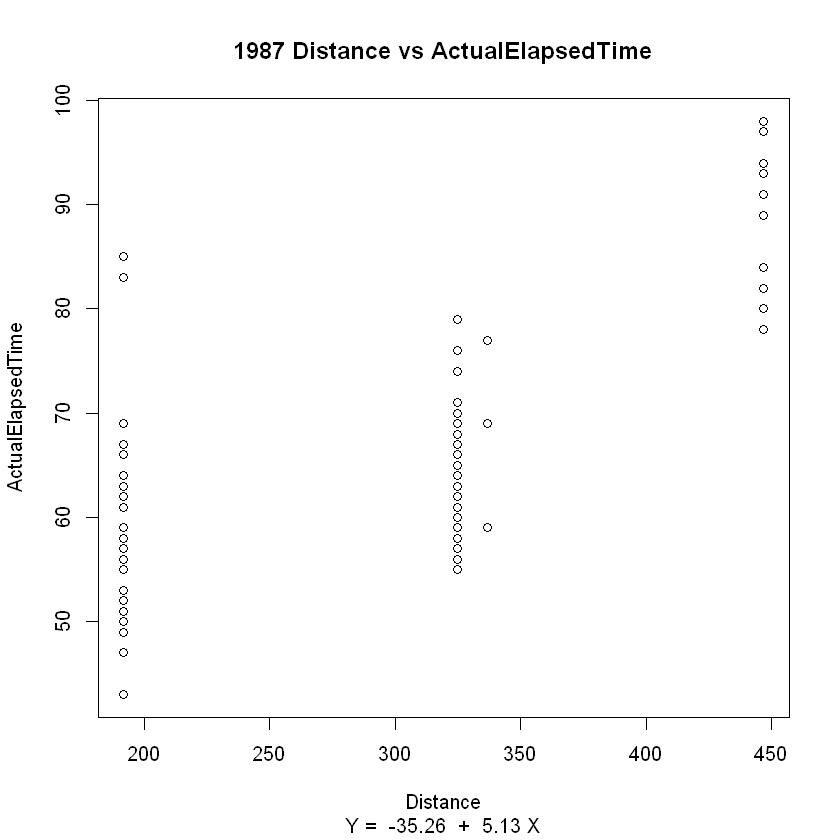

Warning message:
"Closing open result sets"

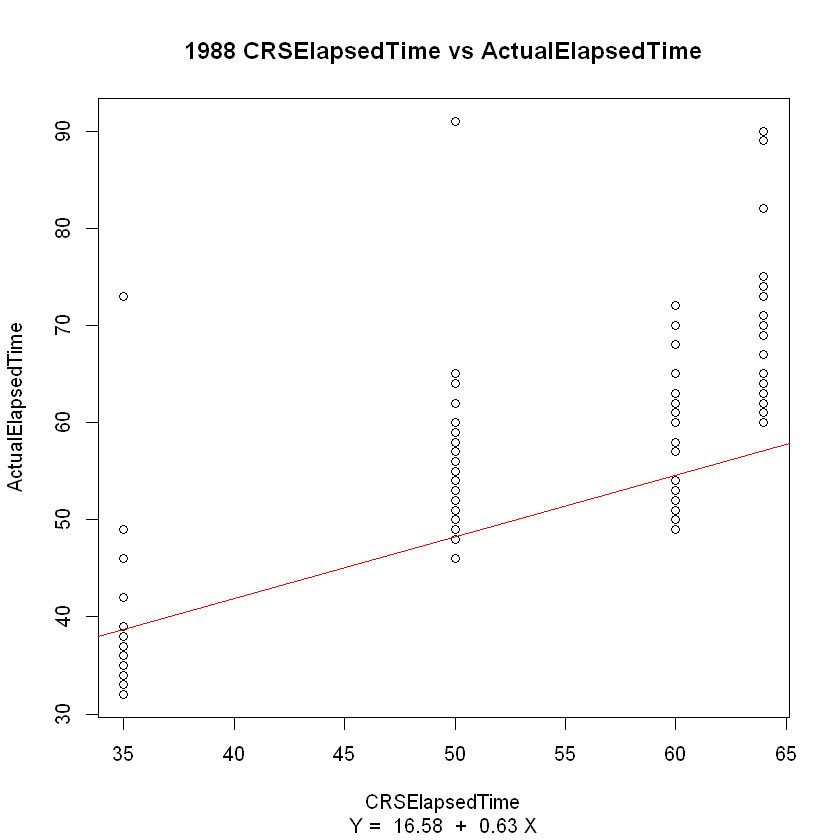

Warning message:
"Closing open result sets"

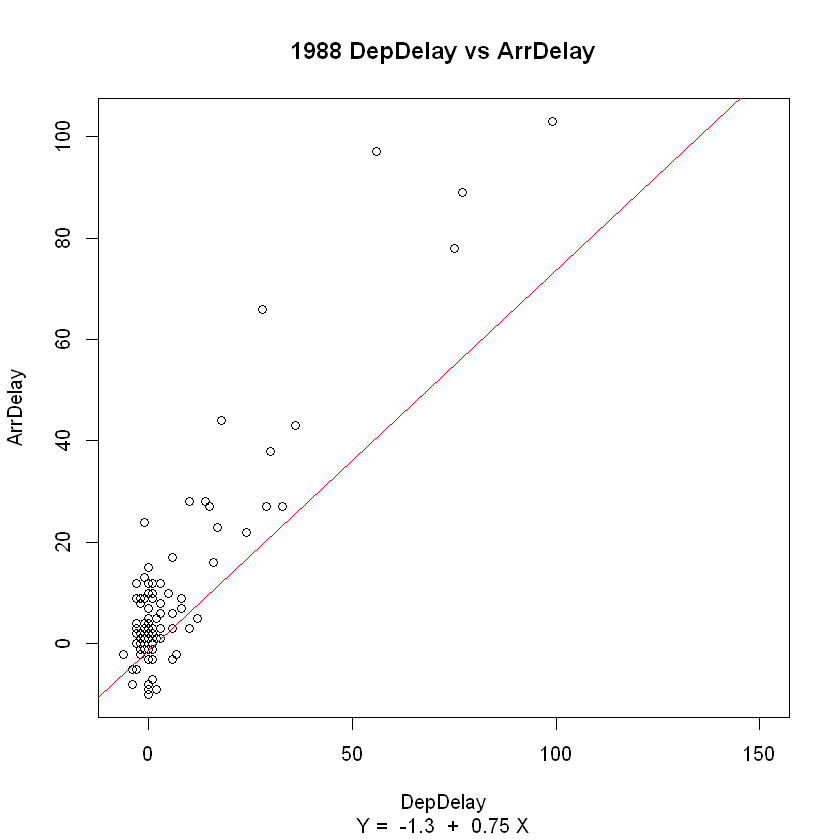

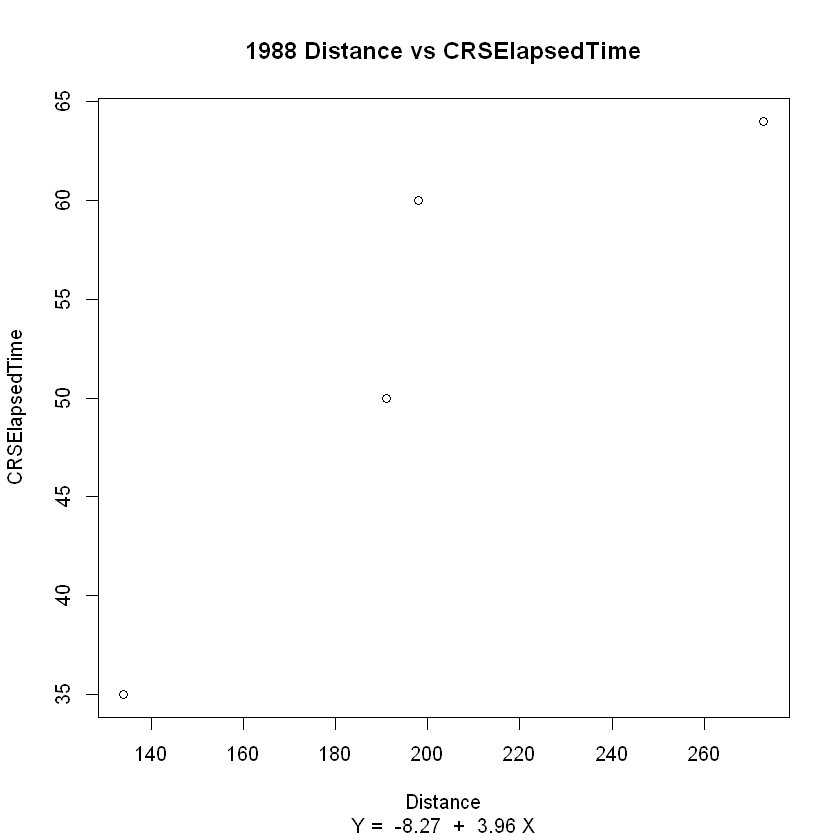

[[1]]
NULL

[[2]]
NULL

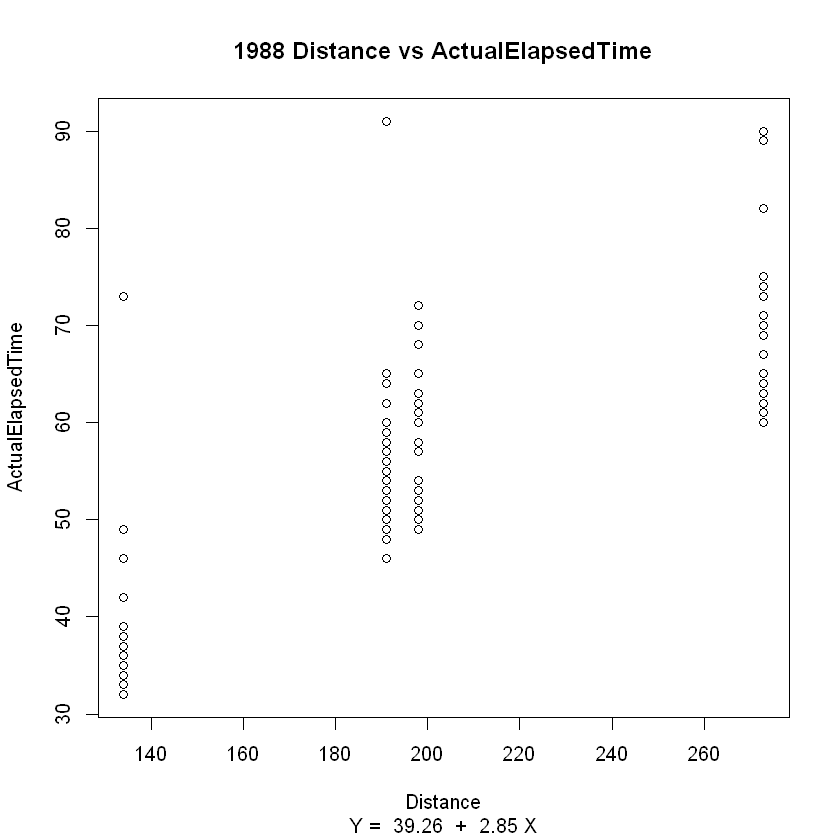

In [5]:
# Diplomado de Ciencia de Datos - ITLA 2018
# Proyecto Final Modulo 1

############################################
#              Preparacion                 #
############################################


##### Conexion a BBDD ######################

# Descargar y cargar libreria RMySQL
#install.packages("RMySQL")
#library('RMySQL')



# Funcion para crear objeto de conexion a MySQL
connectionDB <- function() {
  con <- dbConnect(MySQL(), user='itladsgpo@localhost',
                   password='123456', dbname='proymod1',
                   host='localhost')
  return(con)
}


# Funcion Query SQL y retorna data frame
queryToDf <- function(query) {
  con <- connectionDB()
  res <- dbSendQuery(con, query)
  df <- dbFetch(res, n=-1)
  dbDisconnect(con)
  return(df)
}


# Funcion para plotear un lm
plotLinearRegression <- function(df, year){
  linearModel <- lm(df)
  
  colNames = paste(colnames(df), collapse =" vs ")
  title = paste(year, colNames)
  coeff <- round(linearModel$coefficients, digits = 2)
  formula <- paste('Y = ',coeff[1], ' + ', coeff[2], 'X')
  
  plot(df, main = title, sub = formula)
  abline(linearModel, col='red')
}


# Parejas de variables utilizadas para realizar la regresión.
# Estas fueron sacadas del ejercicio anterior.
variablesOfInterest <- matrix(data = c('CRSElapsedTime','ActualElapsedTime',
                                        'DepDelay','ArrDelay',
                                        'Distance','CRSElapsedTime',
                                        'Distance','ActualElapsedTime'), ncol = 4)


# Funcion que recibe 2 para variables para correlacionar y las plotea
queryAndShowLM <- function(variables, year, samples) {
  mySQLQuery = paste('SELECT', variables[1], ',', variables[2],
                     'FROM rita WHERE year = ', year, 'LIMIT', samples)
  df <- queryToDf(mySQLQuery)
  plotLinearRegression(df, year)
}


# Funcion que crea las graficas de regresion por ano
regression <- function(year, samples){
  #dev.new()
  #par(mfrow=c(2,2))
  apply(variablesOfInterest, 2,  queryAndShowLM, year = year, samples = samples)
}


# Ploteamos todos los anos
lapply(c(1987:1988), regression, samples = 100)


#### Observaciones y comentarios de lo aprendido ####

# Para crear una regresión lineal entre dos variables, 
# estas deben estar correlacionadas entre si. Según el 
# enunciado anterior (correlación), estas están definidas 
# en variablesOfInterest. 
# 
# Para este enunciado se crearon funciones para el cálculo 
# de las regresiones y el ploteo. 
# 
# Según los resultados: 
#   
#   Las variables de DepDelay y ArrDelay dependen una de la otra, 
#   por lo tanto existe una correlación positiva y una regresión 
#   lineal  funcional. 
# 
#   Las variables de CRSElapsedTime y ActualElapsedTime no dependen 
#   una de la otra pero si están correlacionadas según el dataset. 
#   También se puede ver claramente la función de regresión. 
# 
#   Para las demás variables, la correlación dio por encima del 70%, 
#   pero la función de regresión no sigue el comportamiento de estas. 
#   Realmente desconozco la razón de esto. Quizás utilizando otro 
#   método de regresión de un resultado diferente.


